In [23]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [24]:
beers = pd.read_csv('archive/beers.csv')
breweries = pd.read_csv('archive/breweries.csv')

In [25]:
breweries.iloc[408]

Unnamed: 0                          408
name          10 Barrel Brewing Company
city                               Bend
state                                OR
Name: 408, dtype: object

In [26]:
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [27]:
beers = beers.drop(columns=['Unnamed: 0'])

In [28]:
breweries.columns = ['brewery_id', 'name', 'city', 'state']

In [29]:
df  = pd.merge(beers, breweries, on='brewery_id')

In [30]:
df.head(10)

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
7,0.065,NaN,2259,Foreman,American Porter,177,12.0,18th Street Brewery,Gary,IN
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN


Alterando o campo ID pois o mesmo é usado pelo pandas

In [31]:
df.columns = ['abv', 'ibu', 'BeerID', 'BeerName', 'Style', 'BreweryID', 'Ounces', 'BreweryName', 'City', 'State']

In [32]:
 df.describe()

,abv,ibu,BeerID,BreweryID,Ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

## Qual a cervejaria com mais cervejas produzidas?

In [33]:
most_beers = df['BreweryName'].value_counts().nlargest(10)
most_beers

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: BreweryName, dtype: int64

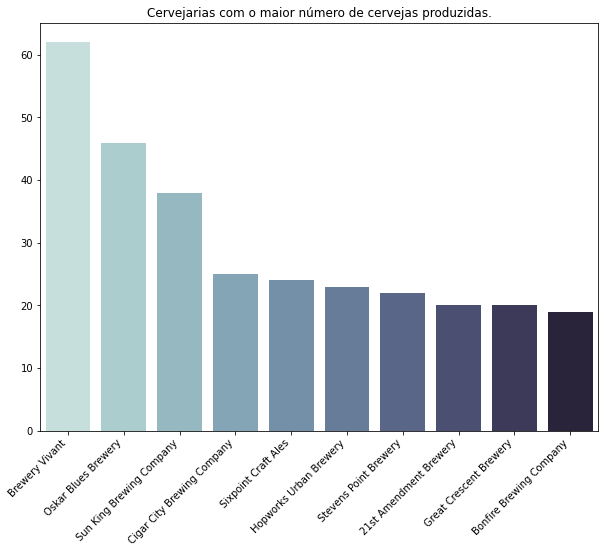

In [34]:
# Apresentação gŕafica

plt.figure(figsize=(10,7.5))
sns.barplot(x=most_beers.index, y=most_beers.values, palette="ch:s=.25,rot=-.35")
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.title('Cervejarias com o maior número de cervejas produzidas.')
plt.show()

## Estilos de cerveja fabricados pela Brewery Vivant

In [35]:
df.loc[df.BreweryName == 'Brewery Vivant']['BeerName'].values

array(['Belfort', 'Star Runner', 'Tart Side of the Barrel',
       'Linnaeus Mango IPA', "Beasts A'Burnin'", 'Verdun',
       'Barrel Aged Triomphe', 'Cherry Doppelbock', 'Tropical Saison',
       'Beach Patrol', 'Nuit Serpent', 'Paris', 'The Grand Army',
       'Acidulated Trip', 'Root Stock', 'Mind Games', 'Sous Chef',
       'Dubbelicious', 'Psychopomp', 'Fat Paczki', 'Earth-Like Planets',
       'Ski Patrol', 'Viking Ice Hole', 'Rye Porter',
       'Wizard Burial Ground', 'Smoky Wheat', 'BRIPA', 'Mela',
       'W.I.P.A Snappa', 'Pepper in the Rye', "Moe Lasses'",
       'Pumpkin Tart', 'Undertaker', 'Undertaker (2014)', "Coq D'Or",
       'North French', 'Agent a Deux', 'Belgian Wit', 'Pothole Stout',
       'Tree Bucket', 'Le Flaneur Ale', 'Maize & Blueberry',
       'Trebuchet Double IPA', 'Contemplation', 'Black Rabbit', 'Zaison',
       'Vivant Tripel', 'Tart Side of the Moon', 'Big Red Coq',
       'Hubris Quadrupel Anniversary Ale',
       'Plow Horse Belgian Style Imperial S

## Qual o estilo de cerveja mais fabricado? 

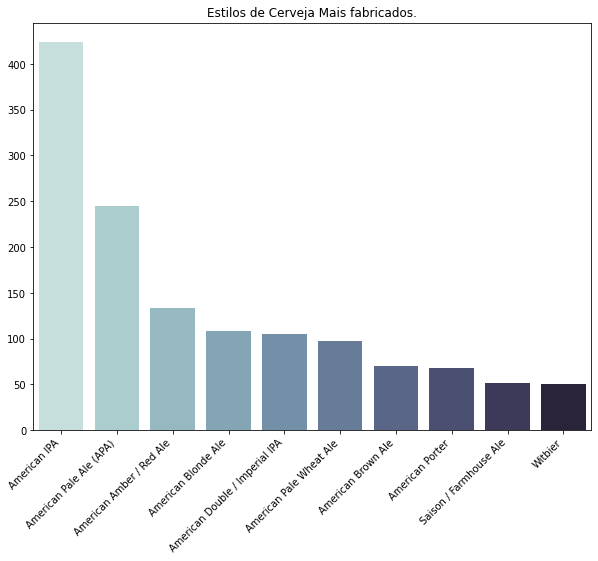

In [36]:
favorite_styles = df['Style'].value_counts()

plt.figure(figsize=(10,7.5))
sns.barplot(x=favorite_styles.index[:10], y=favorite_styles.values[:10], palette="ch:s=.25,rot=-.35")
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.title('Estilos de Cerveja Mais fabricados.')
plt.show()

<AxesSubplot:ylabel='Style'>

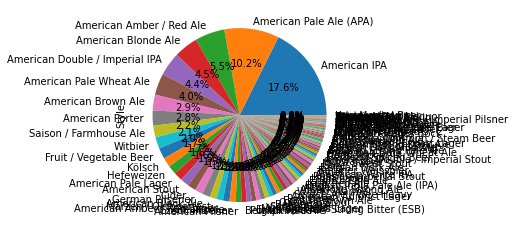

In [37]:
favorite_styles.plot.pie(autopct="%.1f%%")

## Quantos estilos de cerveja são fabricados?

In [38]:
df['Style'].value_counts().sum()

2405

## Quais estados mais produzem cerveja?

In [39]:
states_count_df = df['State'].value_counts().nlargest(10)
states_count_df.head(5)

 CO    265
 CA    183
 MI    162
 IN    139
 TX    130
Name: State, dtype: int64

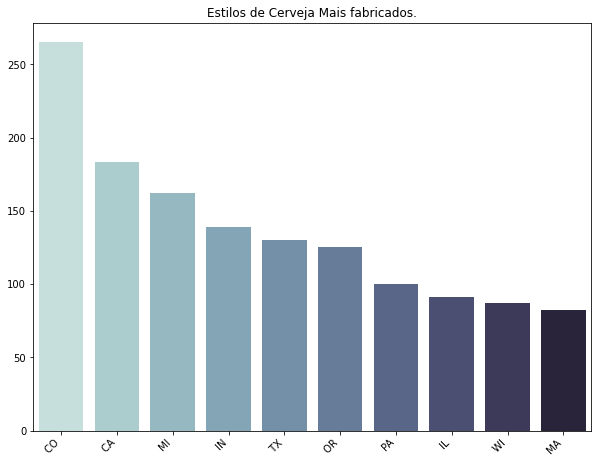

In [40]:
plt.figure(figsize=(10,7.5))
sns.barplot(x=states_count_df.index, y=states_count_df.values, palette="ch:s=.25,rot=-.35")
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.title('Estilos de Cerveja Mais fabricados.')
plt.show()

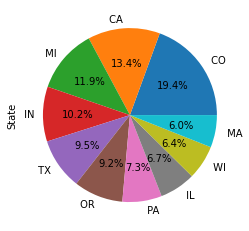

In [41]:
states_count_df.plot.pie(autopct="%.1f%%");

## Como o teor alcólico varia entre o data set?


ABV Mínimo 0.001
ABV Medio 0.05977342419080067
ABV Máximo 0.128


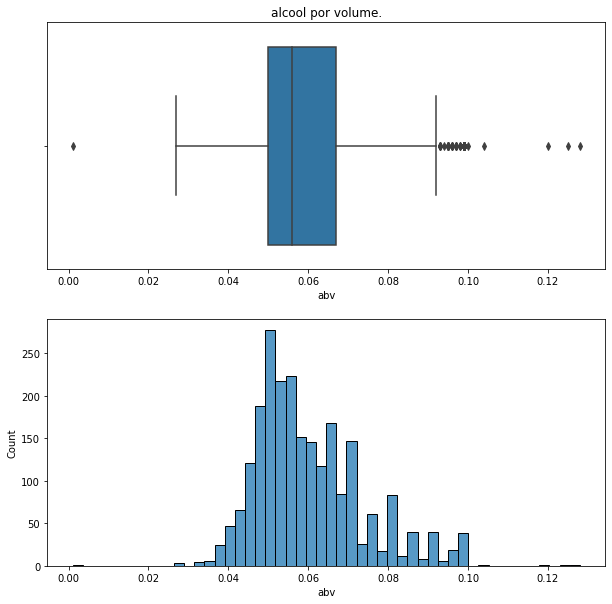

In [42]:
print('ABV Mínimo', df.abv.min())
print('ABV Medio', df.abv.mean())
print('ABV Máximo', df.abv.max())

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.title('alcool por volume.')
sns.boxplot(x='abv', data=df)

plt.subplot(2,1,2)
sns.histplot(data=df, x=df.abv)

plt.show()